### <span style="color:blue">_**Requirements**_</span>
- <span style="color:blue">_**Aggregate Calculation**_</span>  
- <span style="color:blue">_**Compute Frequencies**_</span>  
- <span style="color:blue">_**Visualization**_</span>  
- <span style="color:blue">_**Segment Users Using K-Means Clustering**_</span>


In [11]:
import os, sys
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\Users\ibsan\Desktop\TenX\week-2\notebooks
c:\Users\ibsan\Desktop\TenX\week-2


In [12]:
import pandas as pd
from scripts.ExperienceAnalyzer import ExperienceAnalyzer
from scripts.DataPipline import DataPipeline

In [13]:
# Loads the data from sql
query = "SELECT * FROM xdr_data;"
telecom_df = DataPipeline.load_data_using_sqlalchemy(query=query)
telecom_df.head(3)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/27/2019 2:26,291.0,4/28/2019 2:32,975.0,86742.0,2.082017e+14,3.365881e+10,3.594821e+13,D88388A,...,14993713.0,7989386.0,11062491.0,4726561.0,585655616.0,12612262.0,234449653.0,14690342.0,40952709.0,617094180.0
1,1.304243e+19,4/27/2019 2:26,692.0,4/28/2019 2:26,664.0,86399.0,2.082014e+14,3.365879e+10,8.637690e+13,T72873A,...,19558268.0,12409551.0,973002.0,17541197.0,159411565.0,10051125.0,195290119.0,630521.0,41798770.0,193382903.0
2,1.304243e+19,4/27/2019 2:26,822.0,4/28/2019 2:26,759.0,86399.0,2.082014e+14,3.366690e+10,8.637690e+13,D50890B,...,10035657.0,13463202.0,13817045.0,4593838.0,384558078.0,1821780.0,261936437.0,5249056.0,28459212.0,419435115.0


- <span style="color:blue">_**Aggregate Calculation**_</span>  

In [14]:
Analyzer = ExperienceAnalyzer(telecom_df)
Analyzer.aggregate_user_data()


Aggregated User Data:
        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0        3.360100e+10                 2.080991e+07        46.000000   
1        3.360100e+10                 2.080991e+07        30.000000   
2        3.360100e+10                 2.080991e+07       109.795706   
3        3.360101e+10                 1.066000e+03        69.000000   
4        3.360101e+10                 1.507977e+07        57.000000   
...               ...                          ...              ...   
106851   3.379000e+10                 2.150440e+05        42.000000   
106852   3.379000e+10                 2.080991e+07        34.000000   
106853   3.197021e+12                 2.080991e+07       109.795706   
106854   3.370000e+14                 2.080991e+07       109.795706   
106855   8.823971e+14                 2.080991e+07       109.795706   

                            Handset Type  Avg Bearer TP DL (kbps)  
0         Huawei P20 Lite Huawei Nova 3E                

- <span style="color:blue">_**Compute Frequencies**_</span>  

In [15]:
Analyzer.top_bottom_frequent_values('TCP DL Retrans. Vol (Bytes)', 10)



Top 10 TCP DL Retrans. Vol (Bytes) values:
355       4.294426e+09
58054     4.291380e+09
107022    4.289877e+09
63189     4.289488e+09
76159     4.288060e+09
42060     4.275259e+09
112014    4.268432e+09
149367    4.259997e+09
131393    4.256650e+09
113586    4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP DL Retrans. Vol (Bytes) values:
47470     2.0
132094    2.0
22690     4.0
65805     4.0
66083     4.0
75227     4.0
111987    4.0
124865    4.0
132753    4.0
132803    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most frequent 10 TCP DL Retrans. Vol (Bytes) values:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: count, dtype: int64


In [16]:
Analyzer.top_bottom_frequent_values('Avg RTT DL (ms)', 10)


Top 10 Avg RTT DL (ms) values:
102543    96923.0
102304    64640.0
90287     55811.0
78366     54847.0
95228     26971.0
95832     26250.0
73750     25873.0
3650      25602.0
19697     25374.0
22960     24733.0
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 Avg RTT DL (ms) values:
25704     0.0
46920     0.0
64902     0.0
66254     0.0
114989    0.0
124602    0.0
132529    0.0
133529    0.0
133722    0.0
144116    2.0
Name: Avg RTT DL (ms), dtype: float64

Most frequent 10 Avg RTT DL (ms) values:
Avg RTT DL (ms)
109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: count, dtype: int64


In [17]:
Analyzer.top_bottom_frequent_values('Avg Bearer TP DL (kbps)', 10)


Top 10 Avg Bearer TP DL (kbps) values:
43266     378160.0
63638     299257.0
66046     299002.0
71993     276040.0
14569     269362.0
40167     266332.0
38226     265440.0
11953     264448.0
38941     263047.0
113953    254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Bottom 10 Avg Bearer TP DL (kbps) values:
630     0.0
905     0.0
1175    0.0
1431    0.0
1636    0.0
1679    0.0
1789    0.0
1844    0.0
1863    0.0
1915    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Most frequent 10 Avg Bearer TP DL (kbps) values:
Avg Bearer TP DL (kbps)
23.0    7324
43.0    4352
44.0    4186
6.0     3983
22.0    2867
48.0    2778
63.0    2757
42.0    2689
45.0    2644
47.0    2263
Name: count, dtype: int64


- <span style="color:blue">_**Visualization**_</span>  


Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23184.000000
A-Link Telecom I. Cubot Note Plus                                                       6527.000000
A-Link Telecom I. Cubot Note S                                                          8515.000000
A-Link Telecom I. Cubot Nova                                                           55667.000000
A-Link Telecom I. Cubot Power                                                          69126.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       44.500000
Zyxel Communicat. Lte7460                                                              39741.000000
Zyxel Communicat. Sbg3600                                                              82818.000000
Zyxel Communicat. Zyxel Wah7706                  

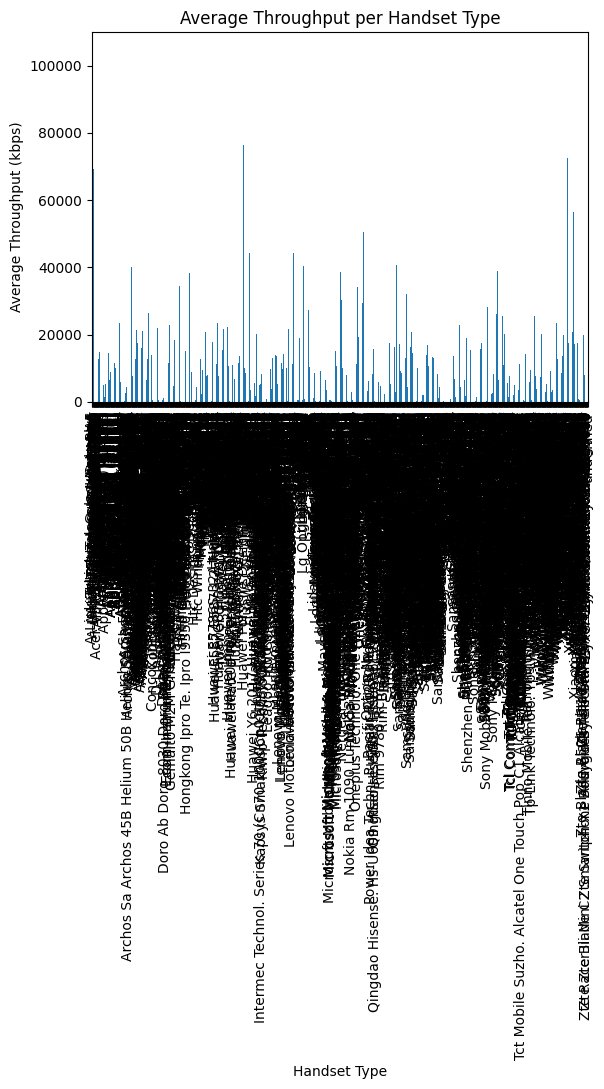

In [18]:
Analyzer.analyze_throughput_per_handset()


Average TCP Retransmission per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             2.080991e+07
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.040629e+07
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706          

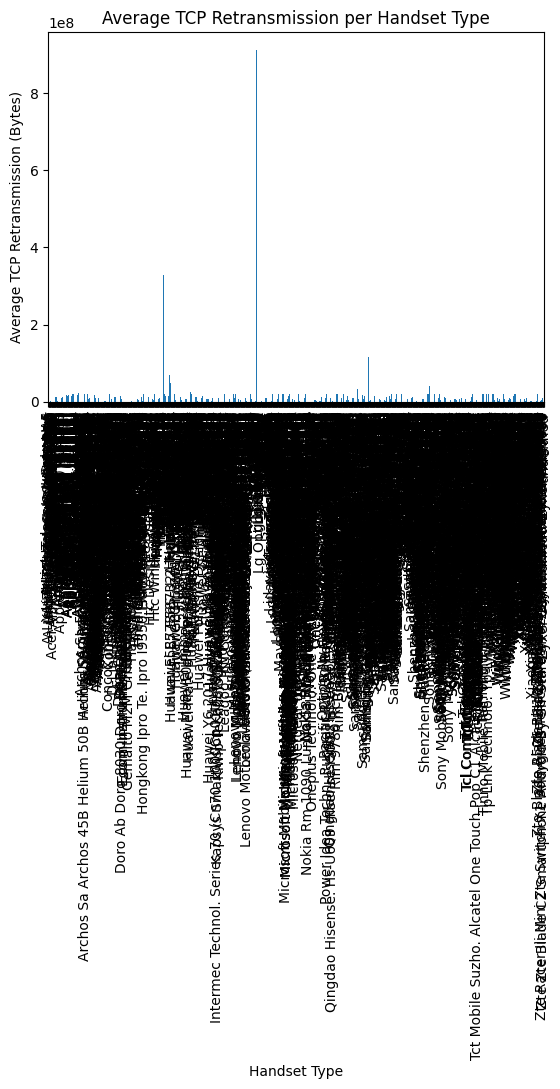

In [19]:
Analyzer.analyze_retransmission_per_handset()

- <span style="color:blue">_**Segment Users Using K-Means Clustering**_</span>

In [20]:
Analyzer.cluster_users()
Analyzer.describe_clusters()


Cluster Descriptions:
Cluster 1:
  - Avg TCP Retransmission: 19596271.37139131
  - Avg RTT DL: 77.31978651944083
  - Avg Throughput: 49171.53965915339
  - Dominant Handset Type: Huawei B528S-23A
  - Cluster Label: High Performance

Cluster 2:
  - Avg TCP Retransmission: 16255732.914408846
  - Avg RTT DL: 126.37262144873844
  - Avg Throughput: 3799.595727480446
  - Dominant Handset Type: Apple iPhone 6S (A1688)
  - Cluster Label: Moderate Performance

Cluster 3:
  - Avg TCP Retransmission: 2224330156.2251687
  - Avg RTT DL: 104.54779874213835
  - Avg Throughput: 62838.40838574424
  - Dominant Handset Type: Huawei B528S-23A
  - Cluster Label: Low Performance

